**Crop disease warning and mitigation**

make sure you upload the 4 images from the drive link given: https://drive.google.com/drive/folders/1cTF-87HCAHJah18LyCWzU33l6hmm35Gl?usp=sharing
before you run our code.

Our main aim is to help farmer bodies identify crop that are either susceptible to or have already got certain diseases affecting their variety.

We have developed a website www.google.com which contain a wide range of information regarding some of the major crops in the country, conditions for their healthy growth,diseases associated with them, prevention and mitigation methods etc..

Once a farmer or a member from any Krishi Bhavan enrolls with us via the website by giving us the location details of area he would like us to survey on, his contact info etc.. we will start the process of our analysis.

1st step would be to find out the major crop in the particular location(if more than one, divide area of interest into smaller parts), this will be our AOI(Area of interest).

next we will aquire satellite images in geo tif format from websites like USDS in 4 bands(R G B IR).
Additional images we would aquire from them are the temperature, humidity and rainfall heat maps of the same area of interest **or** research on weather conditions from weather stations in the area.

These will be our inputs to the below given code.

Here firstly we have worked on creating the NDVI(Normalized Difference Vegetation Index) image of the AOI. This is done by 1st getting the red and IR band images of the same and finding out the NDVI pixel data value from the formula:
NDVI=NIR-RED/NIR+RED
The NVDI tells is basic terms gives us info as to what values of refluctance is shown by each part. Greater value indicating higher refluctance.
By usual analysis we can say that low NDVI values indicate sandy or rocky terrains and high values indicate dense forest. Hence crops like sugarcane, rice etc.. come under mid range of NDVI values.
We can gone through papers and articles on typical NDVI values which showed gave us a range of NDVI values that could possibly indicate lesser healthy crops.

We have considered a test case here where a person had enrolled with us from Gularia UP and the area of interest is dominated by sugarcane crops.
The geo tig image of the area aquired was a recent one dated 23rd of April which suggests is the growing season for sugarcane.
We found the NDVI imagery of the same and colour coded for better understanding (breifly red indicating lower refluctance, yellow moderate and green high).
Along with this we have also plotted a histogram that shows the number of pixels(amount of area) vs NDVI values which shows maximum of it lies in the higher range on NDVI(healthy crop) and lower most range(hilly terrain and rocks).
From here we calculated the index of pixel data values that indicated an Ndvi value corresponding to neither extremes not operfectly healthy crops. Hence we get an apoximate region where diseases might have occured or are likely to occur.

Upon due research we understood that crop diseases occur due to prolonged weather Conditions(temperature,rainfall,humidity), hence these parameters were key to confirm presence of crop diseases as well as identification of the disease.
There are 11 major crop diseases associated with sugarcane(details of which are on the website) among which 3 are mostly found in our considered AOI.
upon doing our research we found out the combination of the 3 parameters(temperature,rainfall,humidity) that cause these diseases,
eg: Redrot is caused due to higher values of all the 3 parameters whereas Brown rust disease is caused in moderate temperatures, low rainfall and high humidity.
hence we mapped the pixel values we got from the NVDI imagery and checked corresponding values in the temperature, rainfall and humidity heat maps of the same area.(we plotted te histograms of these maps as well inorder to obtain accurate ranges that come under low moderate and high).

upon doing this we got rid of some area that didnt favor any of these diseases therefore mightve have a lower NDVI values due to other reasons like late sowing, houses,lack of nutrition etc..
The rest of the area fell into the above categorised diseases.
From this analysis we got the percentge crops affected or in threat of the particular diseases, location of areas in which the disease is found as well as a link redirecting to our website(page with info on the diseases detected, and how to prevent them and cure the crops) which is sent via email to the concerned person or authority.


(1, 2, 3, 4)
-0.1797752808988764
0.65


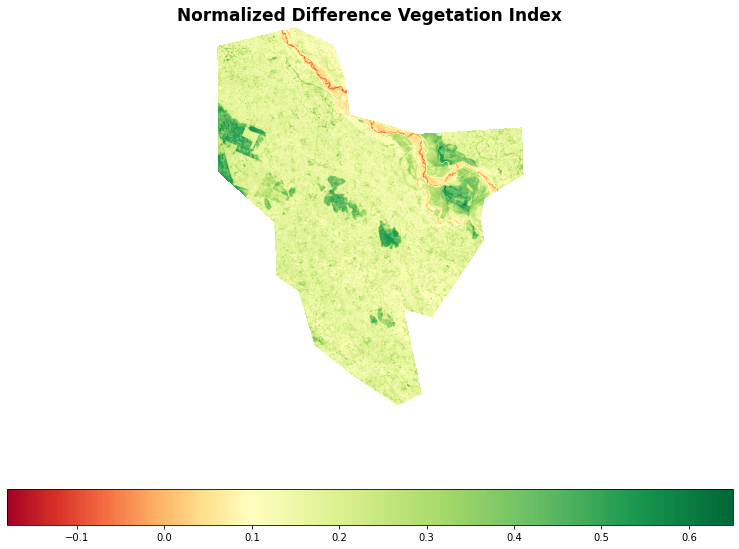

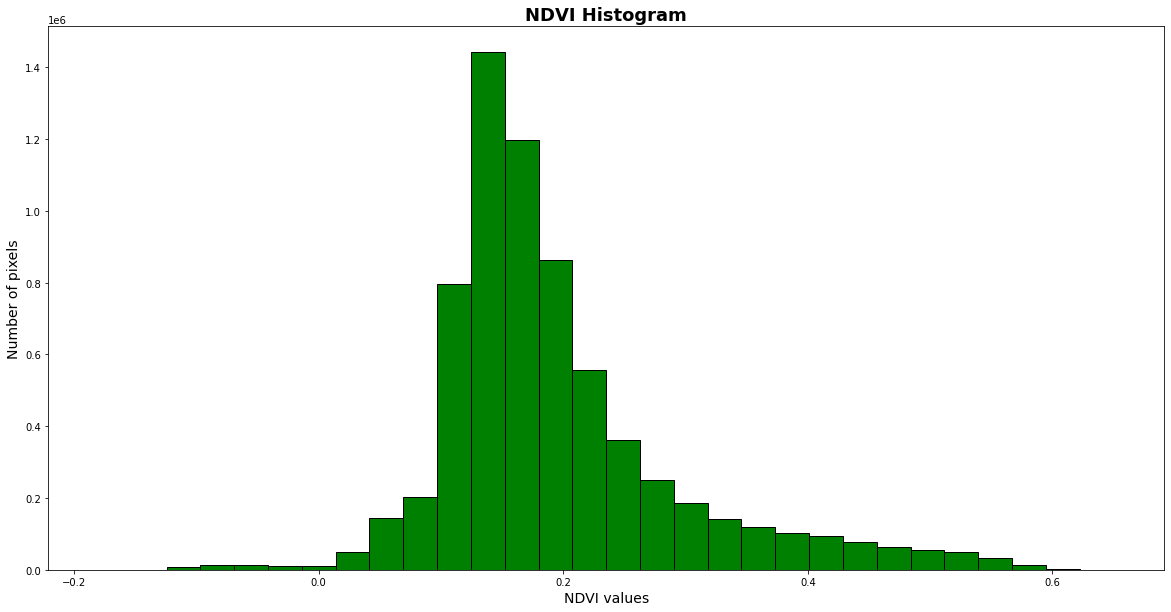

(1,)
(array([   5,    6,    6, ..., 3999, 4000, 4002]), array([ 798,  796,  798, ..., 1904, 1901, 1895]))
[[ 3  7 10 ... 48 48 49]
 [18 22 25 ... 48 47 49]
 [33 37 40 ... 47 46 49]
 ...
 [44 44 43 ... 70 68 71]
 [44 44 44 ... 70 69 71]
 [45 44 44 ... 70 68 70]]
Rows: 100, Columns: 92


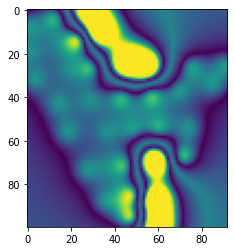

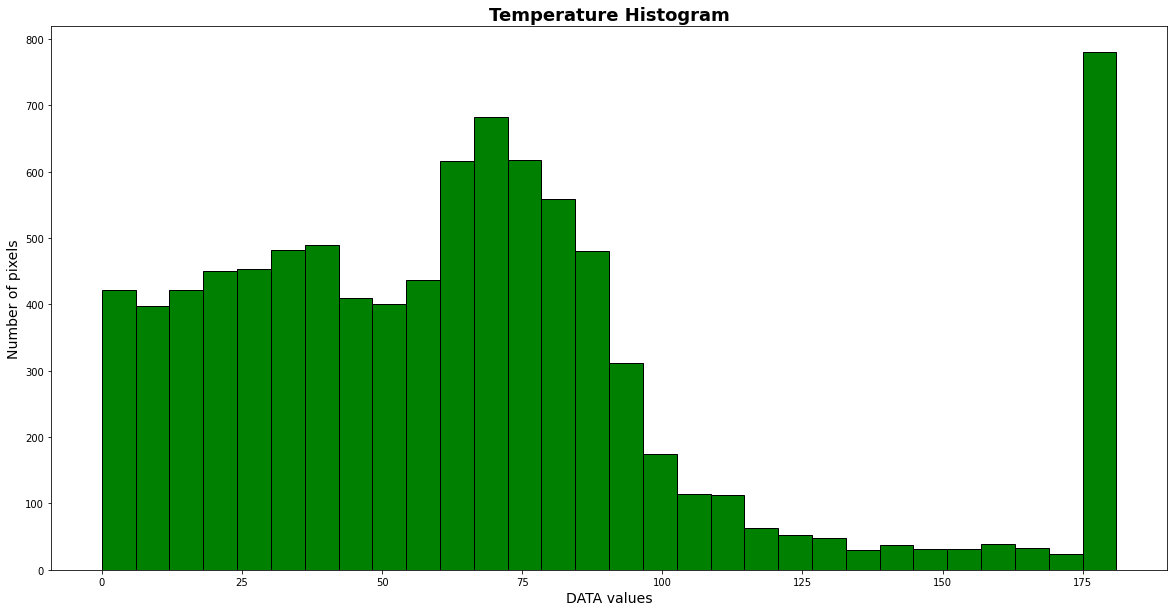

[[ 57  37  13 ...  70  70  70]
 [ 74  53  27 ...  70  70  71]
 [ 93  71  43 ...  71  71  72]
 ...
 [173 174 175 ...  52  50  49]
 [174 175 176 ...  53  52  51]
 [175 175 176 ...  55  53  52]]


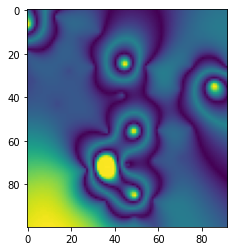

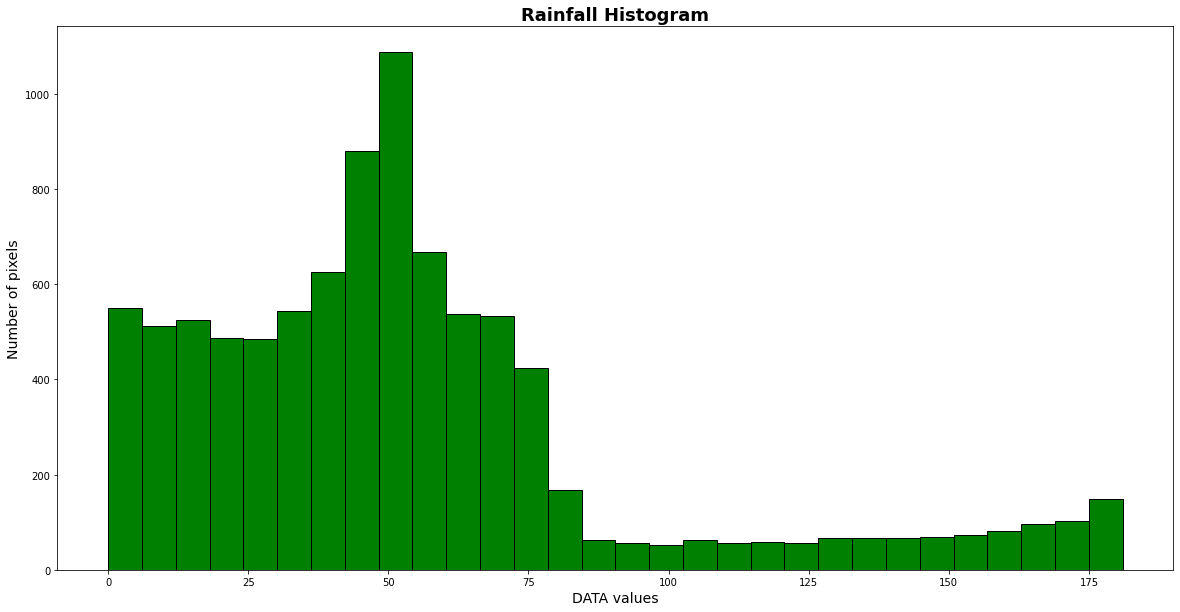

[[22 22 22 ... 37 37 40]
 [20 20 20 ... 37 37 41]
 [18 18 18 ... 37 37 41]
 ...
 [35 35 35 ... 36 36 40]
 [35 35 35 ... 36 36 40]
 [36 35 35 ... 35 35 39]]


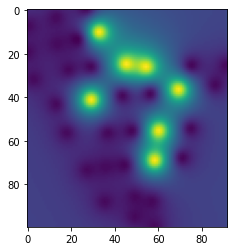

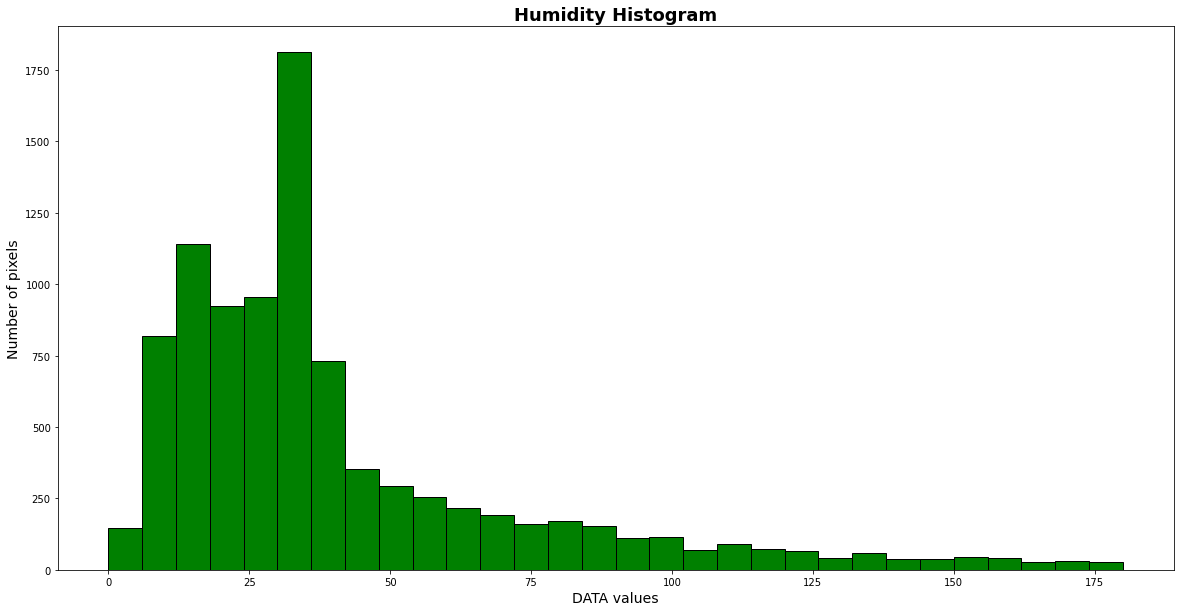

Grassy shoot found in: (452820.0, 3125080.0)
Redrot found in lat,long: (462680.0, 3115220.0)
5130 0 16285
0.03969317869242313 % of redrot is detected, 0.0 % of brown rust is detected, 0.12600456432867654 % of grass shoot is detected


In [ ]:
!pip install earthpy
!pip install cv
!pip install rasterio
import earthpy.plot as ep
from matplotlib import colors
import math
import rasterio
import matplotlib.pyplot as plt
import numpy

def agriculture(a):
  image_file = a
  sat_data = rasterio.open(image_file)

  #getting dimentions in m
  width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
  height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom

  # Upper left pixel
  row_min = 0
  col_min = 0

  # Lower right pixel.  Rows and columns are zero indexing.
  row_max = sat_data.height - 1
  col_max = sat_data.width - 1

  # Transform coordinates with the dataset's affine transformation.
  topleft = sat_data.transform * (row_min, col_min)
  botright = sat_data.transform * (row_max, col_max)


  # sequence of band indexes, we have taken a 4 band image
  print(sat_data.indexes)
  # Load the 4 bands into 2d arrays
  b, g, r, n = sat_data.read()

  filename =a
  with rasterio.open(filename) as src:
      band_red = src.read(3)
  with rasterio.open(filename) as src:
      band_nir = src.read(4)

  # To not display error when divided by zero 

  numpy.seterr(divide='ignore', invalid='ignore')

  # NDVI convertion
  ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

  print(numpy.nanmin(ndvi)) 
  print(numpy.nanmax(ndvi))

  # get the metadata of original GeoTIFF:
  meta = src.meta
  #print(meta)

  # get the dtype of our NDVI array:
  ndvi_dtype = ndvi.dtype

  # set the source metadata as kwargs we'll use to write the new data:
  kwargs = meta

  # update the 'dtype' value to match our NDVI array's dtype:
  kwargs.update(dtype=ndvi_dtype)

  # update the 'count' value since our output will no longer be a 4-band image:
  kwargs.update(count=1)

  # using rasterio to write new raster file 'data/ndvi.tif':
  with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
          dst.write(ndvi, 1)
  #colour coding the NVDI image for better understanding
  class MidpointNormalize(colors.Normalize):
    
      def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
          self.midpoint = midpoint
          colors.Normalize.__init__(self, vmin, vmax, clip)

      def __call__(self, value, clip=None):
        
          x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
          return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

  # Set min/max values from NDVI range for image

  min=numpy.nanmin(ndvi)
  max=numpy.nanmax(ndvi)

  # Set custom midpoint for most effective NDVI analysis
  mid=0.1

  # Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
  colormap = plt.cm.RdYlGn 
  norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
  fig = plt.figure(figsize=(20,10))


  ax = fig.add_subplot(111)

  # Using 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
  cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)


  # Turn off the display of axis labels 
  ax.axis('off')

  # Seing a title 
  ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

  # Configure the colorbar
  cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

  # Call 'savefig' to save this plot to an image file
  fig.savefig("ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

  # let's visualize
  plt.show()

  # Define a new figure
  fig2 = plt.figure(figsize=(20,10))

  # Give this new figure a subplot, which will contain the histogram itself
  ax = fig2.add_subplot(111)

  # Add a title & (x,y) labels to the plot
  plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
  plt.xlabel("NDVI values", fontsize=14)
  plt.ylabel("Number of pixels", fontsize=14)


  # For the x-axis, we want to count every pixel that is not an empty value
  x = ndvi[~numpy.isnan(ndvi)]
  color = 'g'
  # call 'hist` with our x-axis, bins, and color details
  ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

  # Save the generated figure to an external image file
  #fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)

  plt.show()

agriculture("/content/sample_data/23 April 2021.tif")
final_ndvi="ndvi.tif"
sat_dataF = rasterio.open(final_ndvi)
d=sat_dataF.height
e=sat_dataF.width
total=d*e
print (sat_dataF.indexes)
bandF1=sat_dataF.read(1)
#print (bandF1)
result=numpy.where((bandF1>=0.2) & (bandF1<=0.25))
print (result)
#list of coordinates we this are affected crops, to access them we need to use a loop
LOC=list(zip(result[0],result[1]))


#3 significant diseases found in the area of interest for sugarcane crop R= Redrot, B= Brown rust, G= Grassy shoot
# list has 3 indexes [temperature,rainfall,humidity]
R=[1,1,1]
B=[2,3,1]
G=[1,2,3]
#1 being high 2 being moderate and 3 being high

image_fileT = "/content/sample_data/Temp.tif"
sat_dataT = rasterio.open(image_fileT)
#print (sat_dataT.indexes)
#list of band1
band3=sat_dataT.read(1)
print (band3)
print("Rows: {}, Columns: {}".format(sat_dataT.height, sat_dataT.width))
fig = plt.imshow(band3)
plt.show()

 # Define a new figure
fig2 = plt.figure(figsize=(20,10))

  # Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

  # Add a title & (x,y) labels to the plot
plt.title("Temperature Histogram", fontsize=18, fontweight='bold')
plt.xlabel("DATA values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


  # For the x-axis, we want to count every pixel that is not an empty value
x = band3[~numpy.isnan(band3)]
color = 'g'
  # call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()


image_fileR = "/content/sample_data/Rain.tif"
sat_dataR = rasterio.open(image_fileR)
#print (sat_dataR.indexes)
#list of band1
band33=sat_dataR.read(1)
print (band33)
fig = plt.imshow(band33)
plt.show()

 # Define a new figure
fig2 = plt.figure(figsize=(20,10))

  # Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

  # Add a title & (x,y) labels to the plot
plt.title("Rainfall Histogram", fontsize=18, fontweight='bold')
plt.xlabel("DATA values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


  # For the x-axis, we want to count every pixel that is not an empty value
x = band33[~numpy.isnan(band33)]
color = 'g'
  # call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()


image_fileH = "/content/sample_data/Humidity.tif"
sat_dataH = rasterio.open(image_fileH)
#print (sat_dataH.indexes)
#list of band1
band333=sat_dataH.read(1)
print (band333)
fig = plt.imshow(band333)
plt.show()

 # Define a new figure
fig2 = plt.figure(figsize=(20,10))

  # Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

  # Add a title & (x,y) labels to the plot
plt.title("Humidity Histogram", fontsize=18, fontweight='bold')
plt.xlabel("DATA values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


  # For the x-axis, we want to count every pixel that is not an empty value
x = band333[~numpy.isnan(band333)]
color = 'g'
  # call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()


#checking redrot Brown rust and Grassy shoot percentages
r=0
b=0
g=0
for u in LOC:
  i=(u[0]//50,u[1]//50)
  if (band3[i]>=125 and band33[i]>=100 and band333[i]>=125):
    r+=1
    if (r==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transform coordinates with the dataset's affine transformation.
      locationR = sat_dataF.transform * (row, col)
      print("Redrot found in lat,long: {}".format(locationR))
    if (r==0):
      locationR="Disease not found!"
      
  elif (25<=band3[i]<=125 and 0<=band33[i]<=25 and 125<=band333[i]<=175):
    b+=1
    if (b==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transform coordinates with the dataset's affine transformation.
      locationB = sat_dataF.transform * (row, col)
      print("Brown rust found in lat,long: {}".format(locationB))
    if (b==0):
      locationB="Disease not found!"
  elif (band3[i]>=125 and 25<=band33[i]<100 and 0<=band333[i]<50):
    g+=1
    if (g==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transform coordinates with the dataset's affine transformation.
      locationG = sat_dataF.transform * (row, col)
      print("Grassy shoot found in: {}".format(locationG))
    if (g==0):
      locationG="Disease not found!"
  else:
    pass
#amount of each disease in given AOI
print (r,b,g)
#coverting to perfectage
rp=(r/total)*100
bp=(b/total)*100
gp=(g/total)*100
print("{} % of redrot is detected, {} % of brown rust is detected, {} % of grass shoot is detected".format(rp,bp,gp))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')